<div style="background-color: lightblue; color: white; padding: 20px;">
 
<center>    
    <h1><b>Classification Model - NaiveBayes</b></h1>
    <h2>Iris dataset</h2>
</center>
    
<br>
<br>    
    
<div style="background-color: white; padding: 20px; border-radius: 10px; width: 70%; margin-left: 15%;">    
    <img src="iris.png">    
</div>  
    
<br>    
    <div style="background-color: white; color: #777877; width: 30%; margin-left: 35%; padding: 20px; font-size: 16px; line-height: 25px; border-radius: 10px;">
        <ul>
            <li>0. Introduction</li>
            <li>1. Import Dataset</li>
            <li>2. Analisys</li>
            <li>3. Visualization</li>
            <li>4. Modeling</li>
            <li>5. Cross Validation</li>
            <li>6. Prediction Metrics</li>
        </ul>
    </div>
<br>
    
<b>By:</b> Rodrigo Sarroeira    
<br>    
<b>On:</b> 22/02/2021    
</div>

<div style="background-color: lightblue; color: white; padding: 20px;"> 
    <h2 id="intro"><b>0. Introduction </b></h2>
</div>
    
<p style="text-align: justify; padding: 15px;">
In this notebook we are going to implement a very simple example of the Naive Bayes algorithm. The dataset in use will be the famous Iris, used many times for classification demonstrations. This dataset has information about 3 Species of Iris (Setosa, Versicolour, Virginica). The main goal is for our model to read the data and identify each observation correctly, as Setosa, Versicolour or Virginica.
    
<br>
    
<p style="text-align: justify; padding: 15px;">The <b>Naive Bayes</b> algorithm is based on a very simple probabilistic concept, called conditional probability. The Bayes Theorem calculates the probability of a certain event given some pior knowledge related to the event. This Theorem is of great importance for some algorithms, but it is also important to understand better the probabilities of events, based on other factors. </p>

<br>
<br>


<div style="background-color: #dedede; padding: 30px; border-radius: 10px;">
    
<center><h2><b style="color: white;">Bayes Formula</b></h2></center>
    
<div style="background-color: white; padding: 20px; border-radius: 10px; width: 40%; margin-left: 30%; margin-top: 15px;">

$$
    \ P(A|B) = P(A) \ * \ \frac{P(B|A)} {P(B)}  
$$
    
</div>
</div>    

<br>

</p>

In [1]:
library(naivebayes)  # Naive Bayes
library(ggplot2)     # Visualization
library(dplyr)       
library(psych)       # Graph   
library(caret)       # Cross Validation

naivebayes 0.9.7 loaded


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'psych'


The following objects are masked from 'package:ggplot2':

    %+%, alpha


Loading required package: lattice



<div style="background-color: lightblue; color: white; padding: 20px;"> 
<h2>1. Import Dataset</h2>
</div>

In [2]:
data = data(iris)
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


<div style="background-color: lightblue; color: white; padding: 20px;"> 
<h2>2. Analisys</h2>
</div>

In [3]:
str(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [4]:
summary(iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

This dataset is composed 150 observations and by 5 variables, from wich 4 are numeric and 1 is a factor. The `Species` variable is the <b style="color: red;">target</b> variable, or in other words, is the variable we are trying to predict based on the other 4 variables. The independent variables represent widths and lenghts of petals and sepals. Our <b style="color: red;">target</b> variable has 3 possible values: setosa, versicolor and virginica.

<div style="background-color: lightblue; color: white; padding: 20px;"> 
<h3>2.1 Visualization</h3>
</div>

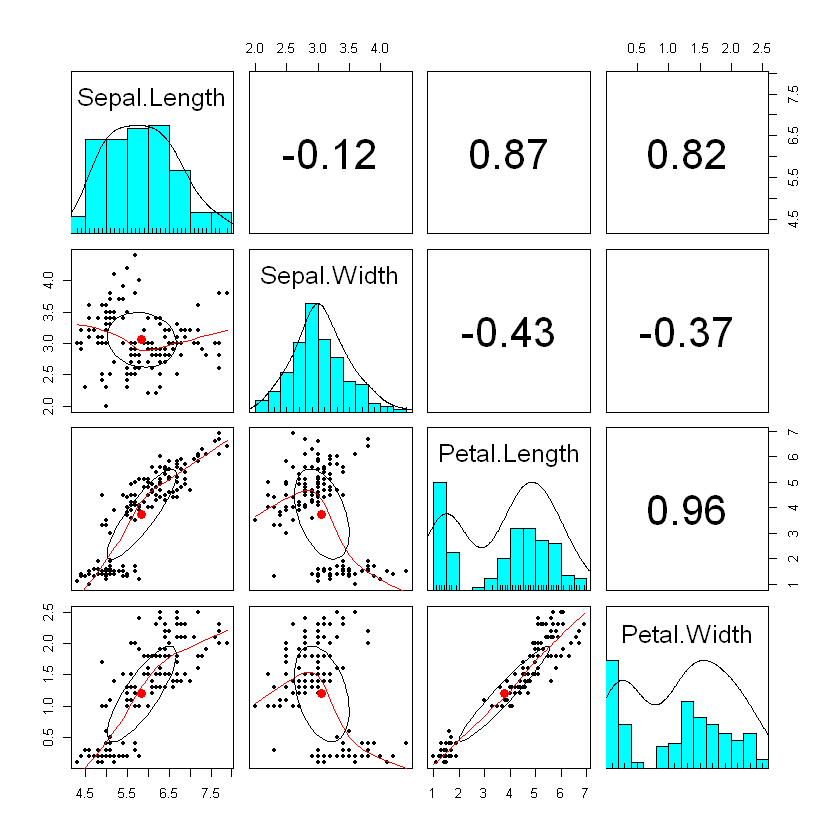

In [5]:
# Visualization of correlation between numeric variables
pairs.panels(iris[-5])

By looking at this graph we are given a lot of information. The distribution of each variable can be found on the principal diagonal. `Sepal.Length` and `Sepal.Width` distribution's are almost simetric, on the other hand, on the ditribution graphs of `Petal.Length` and `Petal.Width` we can find two "clusters". This means that the variables related to the Petals are going to be good predictors of the target variable. 
<br>
In addiction this graph gives us the linear correlation between all variables. The correlation between `Petal.Width` and `Petal.Length` is very high,<b> 0.96</b>. There are 3 positive correlations and 3 negative correlations. The lowest correlation is between `Sepal.Length` and `Sepal.Width`, with a value of <b>-0.12</b>.
<br>
On the lower triangle of this matrix we can see how the variables relate to each other, by interpreting the scatter plots.

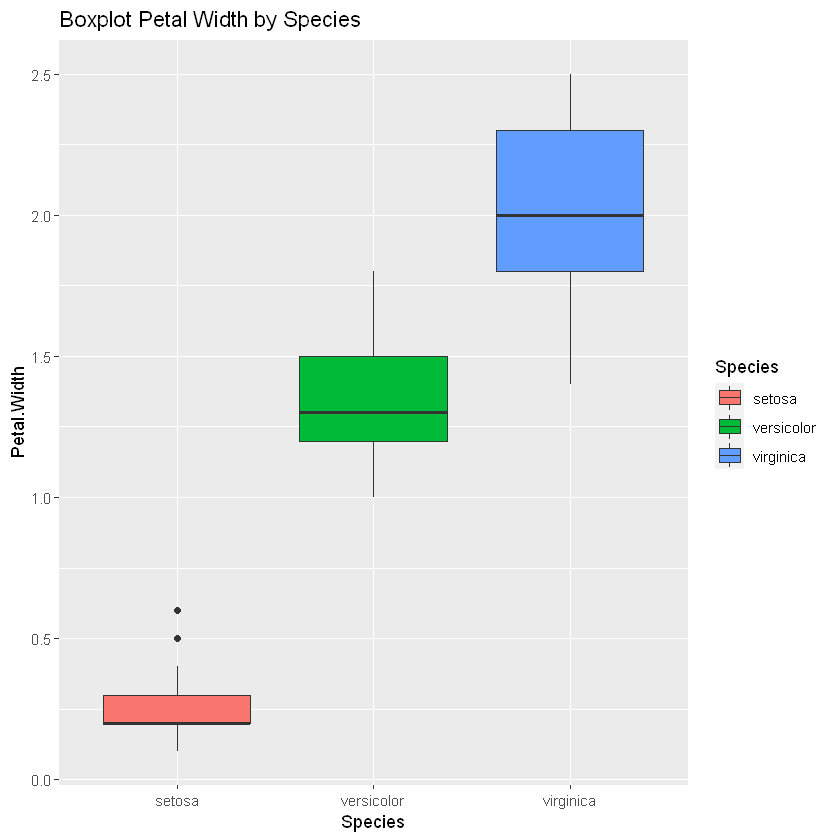

In [6]:
ggplot(iris, aes(x=Species, y=Petal.Width, fill=Species)) +
    geom_boxplot() + 
    ggtitle("Boxplot Petal Width by Species")

These scatter plots built on `ggplot` are a very usefull tool when the target variable is categorical. In each graph we have the information about how the variable is spread, given the `Species`. For example, on the last graph we see that `Setosas` have the smallest Petal Width and that the `Virginicas` have the largest Petals.

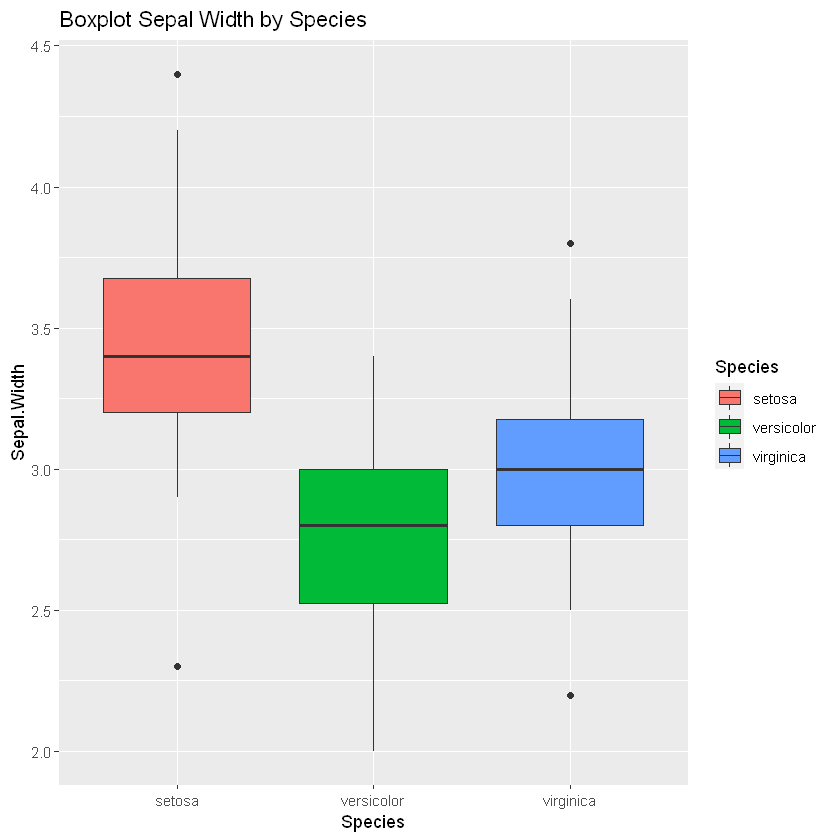

In [7]:
ggplot(iris, aes(x=Species, y=Sepal.Width, fill=Species)) +
    geom_boxplot() + 
    ggtitle("Boxplot Sepal Width by Species")

The "Boxplot Sepal Width by Species" shows us that the `Sepal.Width` isn´t a very good variable to use for the classification, because it's values for different Species are very identical. The next two graphs will reenforce this idea. 

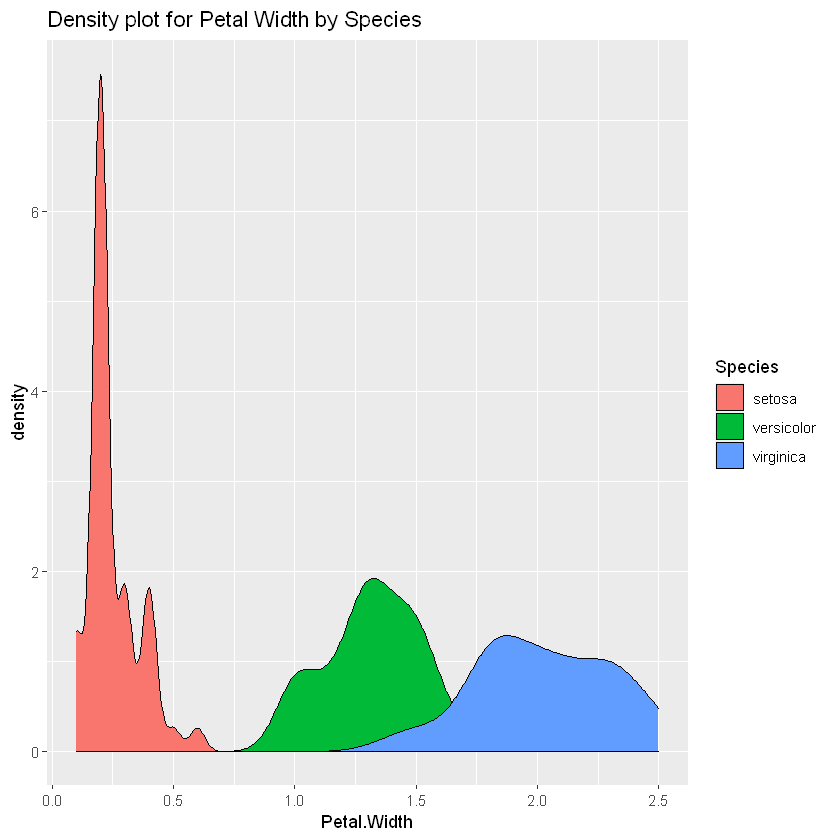

In [8]:
ggplot(iris, aes(x=Petal.Width, fill=Species)) +
    geom_density() + 
    ggtitle("Density plot for Petal Width by Species")

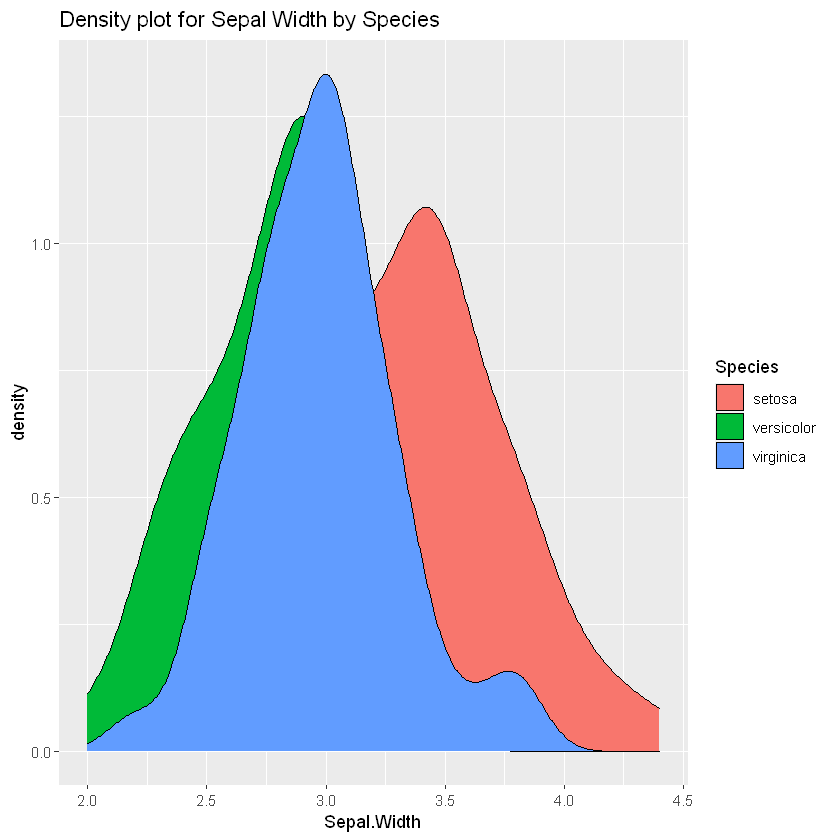

In [9]:
ggplot(iris, aes(x=Sepal.Width, fill=Species)) +
    geom_density() + 
    ggtitle("Density plot for Sepal Width by Species")

The first graph clearly shows that the `Petal.Width` is a good variable to use in the classification formula, because each of the Species have very different values for the Petal Width. On the other hand, when we look to the density graph of the variable `Sepal.Width` we see that all the species share, more or less, the same values for the Sepal Width, making it hard to distinguish them.

<div style="background-color: lightblue; color: white; padding: 20px;"> 
<h2>3. Modeling </h2>
</div>

Before creating a final model, I will create two example models. One using `Petal.Width` and another using `Sepal.Width`. The goal of this examples is to demonstrate how this two variables preform very differently when used on simple naive bayes models.

<div style="background-color: lightblue; color: white; padding: 20px;"> 
<h3>3.1 Modeling with Petal Width </h3>
</div>

In [10]:
nb1 = naive_bayes(Species ~ Petal.Width, data=iris)

In [11]:
# confusion matrix
predicted1 = predict(nb1, iris)
tb1 = table(predicted1, iris$Species)
tb1

Warning message:
"predict.naive_bayes(): more features in the newdata are provided as there are probability tables in the object. Calculation is performed based on features to be found in the tables."


            
predicted1   setosa versicolor virginica
  setosa         50          0         0
  versicolor      0         48         4
  virginica       0          2        46

In [12]:
# Missclassified values
1 - sum(diag(tb1)) / sum(tb1)

[1] 0.04

Only by analizing the boxplot and the density plot for this variable, we were expecting a low percentage of missclassified values. The values of this variable are grouped on clusters, one for each `Species`, making it very easy for the algorithm to predict the right classification. We have a 100% accuracy on `Setosas` and there were only 6 missclassified values, from wich 4 were `Virginicas` and the other 2 `Versicolor`. This represent a total accuracy of<b> 0.96</b>.


<div style="background-color: lightblue; color: white; padding: 20px;"> 
<h3>3.2 Modeling with Sepal Width </h3>
</div>

In [13]:
nb2 = naive_bayes(Species ~ Sepal.Width, data=iris)

In [14]:
predicted2 = predict(nb2, iris)
tb2 = table(predicted2, iris$Species)
tb2

Warning message:
"predict.naive_bayes(): more features in the newdata are provided as there are probability tables in the object. Calculation is performed based on features to be found in the tables."


            
predicted2   setosa versicolor virginica
  setosa         33          2         8
  versicolor      1         27        19
  virginica      16         21        23

In [15]:
# Missclassified values
1 - sum(diag(tb2)) / sum(tb2)

[1] 0.4466667

When we look at the plots for `Sepal.Width` we understand that all Speaces have similar Sepal widths, making it harder for the algorithm to predict the class correctly. Almost half of the observations were classified correctly, and when we look at the classification of virginicas the number of missclassified values is higher than half (27 ou of 50). In this model the Setosas are the Species with more accurately predicted values.

<div style="background-color: lightblue; color: white; padding: 20px;"> 
<h3>3.3 Final Model </h3>
</div>

In [16]:
# model with all the vairiables
nb_final = naive_bayes(Species ~ Petal.Width * Petal.Length + Sepal.Length, data=iris)

# by adding Sepal.Width to the model the number of missclassified values is incremented by one

In [17]:
# Creationg of the confusion matrix
predicted_final = predict(nb_final, iris)
tb = table(predicted_final, iris$Species)
tb

Warning message:
"predict.naive_bayes(): more features in the newdata are provided as there are probability tables in the object. Calculation is performed based on features to be found in the tables."


               
predicted_final setosa versicolor virginica
     setosa         50          0         0
     versicolor      0         48         3
     virginica       0          2        47

In [18]:
# Missclassified values
1 - sum(diag(tb)) / sum(tb)

[1] 0.03333333

This model has the best performance of all possible combinations between all the available variables. The accuracy of this model is <b>96,66%</b>. To make sure our model preforms well for new data, we are going to use a method called <b>Cross Validation</b>, this method enables predicting data from the "train set", as if it is new data for the model.  

<div style="background-color: lightblue; color: white; padding: 20px;"> 
<h2>4. Cross validation - using 6 folds</h2>
</div>

When the number of observation is low (150 is very low), it is usual to resort to the K-fold method. This method divides the dataset in K folds, using K - 1 folds to train the model and 1 folds to test the model. This process is repeated K times, as result all the observations will be predicted as they were new data to the model. This way we garentee that the predictions we are making are not only good `in-sample`, but also `out-of-sample`. 

In [19]:
k = 6   # number of folds
folds = createFolds(iris$Species, k, list=TRUE, returnTrain=FALSE)
str(folds)

List of 6
 $ Fold1: int [1:25] 7 23 30 32 38 40 42 45 59 64 ...
 $ Fold2: int [1:24] 4 9 10 11 25 27 33 48 54 76 ...
 $ Fold3: int [1:26] 2 13 16 29 35 37 43 47 55 58 ...
 $ Fold4: int [1:25] 5 6 19 26 28 34 36 44 50 57 ...
 $ Fold5: int [1:25] 1 3 8 12 14 15 20 21 46 51 ...
 $ Fold6: int [1:25] 17 18 22 24 31 39 41 49 56 61 ...


In [20]:
# Creating vector to store predicted values
predict_vector = rep(NA, nrow(iris))


for(i in 1:k){ 
    
    cross_model = naive_bayes(Species ~ Petal.Width + Petal.Length + Sepal.Length, data=iris[-folds[[i]],])
    test_data = iris[folds[[i]] , c(1,2,3,4)]   
    predict_vector[folds[[i]]] = predict(cross_model, test_data)

}

predict_vector

Warning message:
"predict.naive_bayes(): more features in the newdata are provided as there are probability tables in the object. Calculation is performed based on features to be found in the tables."
Warning message:
"predict.naive_bayes(): more features in the newdata are provided as there are probability tables in the object. Calculation is performed based on features to be found in the tables."
Warning message:
"predict.naive_bayes(): more features in the newdata are provided as there are probability tables in the object. Calculation is performed based on features to be found in the tables."
Warning message:
"predict.naive_bayes(): more features in the newdata are provided as there are probability tables in the object. Calculation is performed based on features to be found in the tables."
Warning message:
"predict.naive_bayes(): more features in the newdata are provided as there are probability tables in the object. Calculation is performed based on features to be found in the tabl

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2
 [75] 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 2 3 3 3 3
[112] 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[149] 3 3

The output vector classifies each `Specie` with a number, to enable the comparison between `predicted_vector` and the actual values, we must replace all numbers with the respective `Species` associated with it. 

In [21]:
# predicted values for Species
predict_vector[predict_vector==1] = "setosa"
predict_vector[predict_vector==2] = "versicolor"
predict_vector[predict_vector==3] = "virginica"

predict_vector = as.factor(predict_vector)

predict_vector

[1] setosa     setosa     setosa     setosa     setosa     setosa    
  [7] setosa     setosa     setosa     setosa     setosa     setosa    
 [13] setosa     setosa     setosa     setosa     setosa     setosa    
 [19] setosa     setosa     setosa     setosa     setosa     setosa    
 [25] setosa     setosa     setosa     setosa     setosa     setosa    
 [31] setosa     setosa     setosa     setosa     setosa     setosa    
 [37] setosa     setosa     setosa     setosa     setosa     setosa    
 [43] setosa     setosa     setosa     setosa     setosa     setosa    
 [49] setosa     setosa     versicolor versicolor virginica  versicolor
 [55] versicolor versicolor versicolor versicolor versicolor versicolor
 [61] versicolor versicolor versicolor versicolor versicolor versicolor
 [67] versicolor versicolor versicolor versicolor virginica  versicolor
 [73] versicolor versicolor versicolor versicolor versicolor virginica 
 [79] versicolor versicolor versicolor versicolor versicolor versicolor
 [85] versicolor versicolor versicolor versicolor versicolor versicolor
 [91] versicolor versicolor versicolor versicolor versicolor versicolor
 [97] versicolor versicolor versicolor versicolor virginica  virginica 
[103] virginica  virginica  virginica  virginica  versicolor virginica 
[109] virginica  virginica  virginica  virginica  virginica  virginica 
[115] virginica  virginica  virginica  virginica  virginica  versicolor
[121] virginica  virginica  virginica  virginica  virginica  virginica 
[127] virginica  virginica  virginica  virginica  virginica  virginica 
[133] virginica  versicolor virginica  virginica  virginica  virginica 
[139] virginica  virginica  virginica  virginica  virginica  virginica 
[145] virginica  virginica  virginica  virginica  virginica  virginica 
Levels: setosa versicolor virginica

In [22]:
tb_final = table(predict_vector, iris$Species)
tb_final

              
predict_vector setosa versicolor virginica
    setosa         50          0         0
    versicolor      0         47         3
    virginica       0          3        47

In [23]:
performance = 1 - sum(diag(tb_final)) / sum(tb_final)
performance

[1] 0.04

Now we made sure that our model preforms well, both <b>in</b> and <b>out</b> of sample. Using this method we got a very low error of classification, only <b>4% or 5%</b> of the values were not label correctly. The `performance` can have different values, because the method that the function `createFolds()` uses has a random component, making it possible for values to float round 4 or 5 percent.

<div style="background-color: lightblue; color: white; padding: 20px;"> 
<h2>5. Prediction Metrics </h2>
</div>

To evaluate the preformance of our model we are going to use come metrics. To calculate them we are going to use the values of the confusion matrix created before, stored inside the `tb_final` variable. 

In [24]:
tb_final

              
predict_vector setosa versicolor virginica
    setosa         50          0         0
    versicolor      0         47         3
    virginica       0          3        47

The `accuracy` is a metric that calculates the proportion of well classified observations. Therefore you can obtain the proportion of missclassified observations by doing `1 - accuracy`.

In [25]:
# proportion of certain predictions
accuracy = sum(diag(tb_final)) / sum(tb_final)
accuracy

[1] 0.96

In [26]:
# proportion of missclassified values
missclassified = 1 - sum(diag(tb_final)) / sum(tb_final)
missclassified

[1] 0.04

The precision for `Setosas` evaluates the proportion of real Setosas out of all the predicted Setosas. This metric gives us the level of certainty, with which we can predict observations of a determined category. As we can see the `precision_setosa` is `1`, meaning that all setosas were well classified. 

In [27]:
# precision prediction setosas
precision_setosa = tb_final[1,1] / sum(tb_final[,1])
precision_setosa

[1] 1

In [28]:
# precision prediction versicolors
precision_versicolor = tb_final[2,2] / sum(tb_final[,2])
precision_versicolor

[1] 0.94

In [29]:
# precision prediction virginic
precision_virginica = tb_final[3,3] / sum(tb_final[,3])
precision_virginica

[1] 0.94

On the other hand, the sensivity metric measures the proportion of correcly identified observations, out of all real observations of that category. For example, as `sensivity_versicolor = 1`, the proportion of well classified `versicolors` out of all `versicolors` is 94,12%.

In [30]:
# proportion of right classifications for setosas
sensivity_setosa = tb_final[1,1] / sum(tb_final[1,])
sensivity_setosa

[1] 1

In [31]:
# proportion of right classifications for versicolors
sensivity_versicolor = tb_final[2,2] / sum(tb_final[2,])
sensivity_versicolor

[1] 0.94

In [32]:
# proportion of right classifications for virginicas
sensivity_virginica = tb_final[3,3] / sum(tb_final[3,])
sensivity_virginica

[1] 0.94

<div style="background-color: lightblue; color: white;">
<br>
<br>
<center><h2><b> We have reached the end of this simple example. Thanks for reading!  </b></h2></center>
<br>
<br>
</div>